# KSI monitoring: vlny
V tomto souboru jsou data relevantní k jednotlivým vlnám. Typicky se generují pouze pro vlny v aktuálním ročníku.

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from collections import OrderedDict, namedtuple
from sqlalchemy import func, distinct, text, and_
import pandas as pd

import util
from util.year import year as current_year
from db import session
import model
from datetime import datetime

plt.rcParams['figure.figsize'] = [8, 6]
print(datetime.now())

2019-05-14 20:12:48.395004


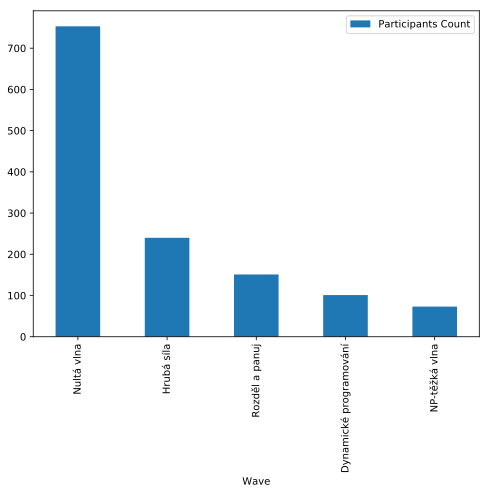

In [9]:
per_wave = session.query(model.Wave,
                         func.count(distinct(model.User.id))).\
    join(model.Wave.tasks).join(model.Task.modules).\
    join(model.Module.submitters).\
    filter(model.User.role == 'participant').\
    filter(model.Wave.year == current_year.id).\
    group_by(model.Wave).order_by(model.Wave.index).all()

df = pd.DataFrame(per_wave, columns=['Wave', 'Participants Count']).set_index('Wave')
df.plot.bar();

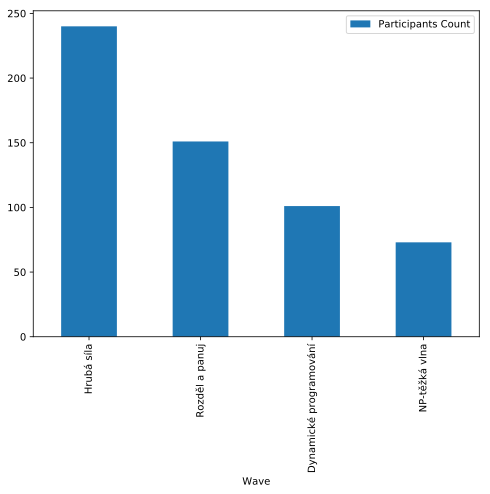

In [10]:
per_wave = list(filter(lambda w: w[0].index > 0, per_wave))
df = pd.DataFrame(per_wave, columns=['Wave', 'Participants Count']).set_index('Wave')
df.plot.bar();